In [109]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
import plotly as py # a little diff than examples on plotly.com, but more flexible
import plotly.graph_objs as go
py.tools.set_credentials_file(username='dyoung418', api_key='mLMzcZwQ3mk8xJ2PZ1Qw') # account on plot.ly
py.offline.init_notebook_mode(connected=True)

# mapbox.com is a separate service from plotly, but plotly
# has plot types that use them.  So put mapbox.com account
# token here.
mapbox_access_token = "pk.eyJ1IjoiZHlvdW5nNDE4IiwiYSI6ImNqY256bjRkajFwZXYyd285b2pybTVhbGsifQ.yxud2H9JpBEG-qmk7EDH7A"


# Read the BizOps Commute data

In [111]:
df_commute = pd.read_csv("commuting.csv", dtype={'zip':str, 'commute_minutes':np.int32})
df_commute

,Timestamp,email,job,zip,shuttle,alternative,commute_text,commute_minutes
0,1/10/2018 13:53:21,lehla@google.com,assoc,94040,No,Drive,15 mins,15
1,1/10/2018 14:13:08,dannyyoung@google.com,dir,94022,No,car,25 min,25
2,1/10/2018 14:13:22,wendyklogan@google.com,prin,94105,No,Driving,1.5 hours each way,90
3,1/10/2018 14:13:25,akurzrok@google.com,assoc,94114,Yes,NaN,"1 hour 35 minutes each way, plus/minus 20 mins",95
4,1/10/2018 14:13:31,daveqsang@google.com,assoc,94040,No,Bike,10,10
5,1/10/2018 14:13:58,manuelribeiro@google.com,assoc,94103,Yes,NaN,1h30,90
6,1/10/2018 14:14:31,haileycrowel@google.com,assoc,94109,Yes,NaN,"1:20 in the morning, 1:45 in the evening for a...",90
7,1/10/2018 14:14:31,stevenpecht@google.com,assoc,94102,Yes,NaN,1.5 hrs each way,90
8,1/10/2018 14:15:04,jsbrito@google.com,assoc,94108,Yes,NaN,"2.25 hours (However, I take a 6:20a and a 7:00...",145
9,1/10/2018 14:15:48,skoblin@google.com,assoc,94041,No,Car or Bike,15 mins,15


In [112]:
df_commute.commute_minutes.describe()

count     51.000000
mean      65.901961
std       45.140782
min        7.000000
25%       24.000000
50%       60.000000
75%       97.500000
max      180.000000
Name: commute_minutes, dtype: float64

In [113]:
df_commute['commute_bins'] = pd.cut(df_commute.commute_minutes, bins=[0,60,120,np.inf], right=False, retbins=False)
print(df_commute.head())
df_commute.groupby(['commute_bins']).count()

            Timestamp                   email    job    zip shuttle  \
0  1/10/2018 13:53:21        lehla@google.com  assoc  94040      No   
1  1/10/2018 14:13:08   dannyyoung@google.com    dir  94022      No   
2  1/10/2018 14:13:22  wendyklogan@google.com   prin  94105      No   
3  1/10/2018 14:13:25     akurzrok@google.com  assoc  94114     Yes   
4  1/10/2018 14:13:31    daveqsang@google.com  assoc  94040      No   

  alternative                                    commute_text  \
0       Drive                                         15 mins   
1         car                                          25 min   
2     Driving                              1.5 hours each way   
3         NaN  1 hour 35 minutes each way, plus/minus 20 mins   
4        Bike                                              10   

   commute_minutes   commute_bins  
0               15    [0.0, 60.0)  
1               25    [0.0, 60.0)  
2               90  [60.0, 120.0)  
3               95  [60.0, 120.0)  
4 

,Timestamp,email,job,zip,shuttle,alternative,commute_text,commute_minutes
commute_bins,,,,,,,,
"[0.0, 60.0)",24,24,24,23,24,20,24,24
"[60.0, 120.0)",19,19,19,19,19,5,19,19
"[120.0, inf)",8,8,8,8,8,0,8,8


# Graph commute times

Text(0,0.5,'Number of BizOpsers')

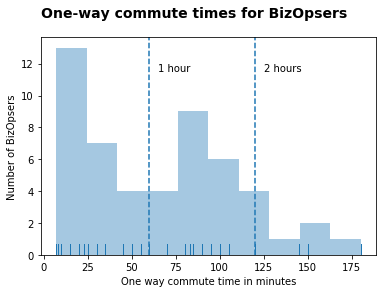

In [114]:
ax = sns.distplot(df_commute.commute_minutes, kde=False, bins=10, rug=True)
ax.axvline(x=60, linestyle='--')
ax.text(x=65, y=11.5, s='1 hour')
ax.axvline(x=120, linestyle='--')
ax.text(x=125, y=11.5, s='2 hours')
ax.set_title('One-way commute times for BizOpsers', loc='left', 
             fontdict={'fontsize':14, 'fontweight':'bold', 'verticalalignment':'bottom'},
            position=(0,1.05))
ax.set_xlabel('One way commute time in minutes')
ax.set_ylabel('Number of BizOpsers')


In [115]:
print(ax.figure.canvas.get_supported_filetypes())
ax.figure.savefig('commute_times.svg', transparent=True, dpi=200, bbox_inches="tight")

{'ps': 'Postscript', 'eps': 'Encapsulated Postscript', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format'}


# Read in a Zip Code data file (with Lat/Lon)

In [116]:
# I got this at  download.geonames.org/export/zip
# I pulled into a spreadsheet and added column headers and saved as a csv file
# (it had been tab delimited and constant width)
# However, my spreadsheet saved it as tab delimited even though I specified csv
# hence the sep="\t"
df_zips = pd.read_csv("/home/danny/Downloads/US.csv", sep='\t', dtype={'zip_code': str})
df_zips.head()

,country,zip_code,city,state,state_code,county,county_code,place,place_code,latitude,longitude,accuracy
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,1.0
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211,1.0
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8410,-163.4368,1.0
3,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056,1.0
4,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914,1.0


# Merge BizOps and ZipCode data

In [117]:
commute = df_commute.merge(right=df_zips, how='left', left_on='zip', right_on='zip_code')
commute.head()

,Timestamp,email,job,zip,shuttle,alternative,commute_text,commute_minutes,commute_bins,country,...,city,state,state_code,county,county_code,place,place_code,latitude,longitude,accuracy
0,1/10/2018 13:53:21,lehla@google.com,assoc,94040,No,Drive,15 mins,15,"[0.0, 60.0)",US,...,Mountain View,California,CA,Santa Clara,85.0,NaN,NaN,37.3855,-122.0880,4.0
1,1/10/2018 14:13:08,dannyyoung@google.com,dir,94022,No,car,25 min,25,"[0.0, 60.0)",US,...,Los Altos,California,CA,Santa Clara,85.0,NaN,NaN,37.3814,-122.1258,4.0
2,1/10/2018 14:13:22,wendyklogan@google.com,prin,94105,No,Driving,1.5 hours each way,90,"[60.0, 120.0)",US,...,San Francisco,California,CA,City and County of San Francisco,75.0,NaN,NaN,37.7864,-122.3892,4.0
3,1/10/2018 14:13:25,akurzrok@google.com,assoc,94114,Yes,NaN,"1 hour 35 minutes each way, plus/minus 20 mins",95,"[60.0, 120.0)",US,...,San Francisco,California,CA,City and County of San Francisco,75.0,NaN,NaN,37.7587,-122.4330,4.0
4,1/10/2018 14:13:31,daveqsang@google.com,assoc,94040,No,Bike,10,10,"[0.0, 60.0)",US,...,Mountain View,California,CA,Santa Clara,85.0,NaN,NaN,37.3855,-122.0880,4.0


# Sumarize BizOpsers by City and Region

In [118]:
def get_area(city):
    groupings = {'Atherton':'Peninsula', 'Burlingame':'Peninsula', 'Los Altos':'Near MTV',
                'Menlo Park':'Peninsula', 'Mountain View':'Near MTV', 'Oakland':'SF/Oakland',
                'Palo Alto':'Near MTV', 'Redwood City':'Peninsula', 'San Carlos':'Peninsula',
                'San Francisco':'SF/Oakland', 'San Jose':'South Bay', 'San Mateo':'Peninsula',
                'Santa Clara':'South Bay', 'Saratoga':'South Bay', 'Sunnyvale':'Near MTV'}
    return groupings[city]

In [119]:
commute['area'] = commute.city.dropna().apply(get_area)

In [120]:
cities = commute.groupby(['city']).email.count()
cities

city
Atherton          1
Burlingame        2
Los Altos         3
Menlo Park        1
Mountain View     8
Oakland           1
Palo Alto         2
Redwood City      3
San Carlos        1
San Francisco    22
San Jose          1
San Mateo         1
Santa Clara       1
Saratoga          1
Sunnyvale         2
Name: email, dtype: int64

In [121]:
print(commute.groupby(['area']).commute_minutes.mean())
print(commute.groupby(['area', 'shuttle']).email.count())

area
Near MTV       17.866667
Peninsula      51.111111
SF/Oakland    106.434783
South Bay      56.666667
Name: commute_minutes, dtype: float64
area        shuttle                                                 
Near MTV    No                                                          12
            Yes                                                          2
            sometimes                                                    1
Peninsula   No                                                           5
            Occasionally (used to 100%, but now driving 90% of time)     1
            Shuttle two days a week                                      1
            Yes                                                          2
SF/Oakland  No                                                           3
            Yes                                                         20
South Bay   No                                                           1
            Yes                       

In [122]:
def get_area(city):
    groupings = {'Atherton':'Peninsula', 'Burlingame':'Peninsula', 'Los Altos':'Near MTV',
                'Menlo Park':'Peninsula', 'Mountain View':'Near MTV', 'Oakland':'SF/Oakland',
                'Palo Alto':'Near MTV', 'Redwood City':'Peninsula', 'San Carlos':'Peninsula',
                'San Francisco':'SF/Oakland', 'San Jose':'South Bay', 'San Mateo':'Peninsula',
                'Santa Clara':'South Bay', 'Saratoga':'South Bay', 'Sunnyvale':'Near MTV'}
    return groupings[city]
cities.groupby(get_area).sum()
#cities.groupby(get_area).sum().plot(kind='bar', stacked=True)

Near MTV      15
Peninsula      9
SF/Oakland    23
South Bay      3
Name: email, dtype: int64

In [123]:
print(commute.groupby(['job']).email.count())
print(commute.groupby(['job']).commute_minutes.mean())
print(commute.groupby(['job', 'shuttle']).email.count())
print(commute.groupby(['job', 'area']).email.count())

job
assoc    31
dir       6
prin     14
Name: email, dtype: int64
job
assoc    77.677419
dir      33.833333
prin     53.571429
Name: commute_minutes, dtype: float64
job    shuttle                                                 
assoc  No                                                           9
       Shuttle two days a week                                      1
       Yes                                                         20
       sometimes                                                    1
dir    No                                                           6
prin   No                                                           7
       Occasionally (used to 100%, but now driving 90% of time)     1
       Yes                                                          6
Name: email, dtype: int64
job    area      
assoc  Near MTV       7
       Peninsula      4
       SF/Oakland    18
       South Bay      2
dir    Near MTV       4
       Peninsula      1
       SF/Oakland     1

# Create small summary of counts in each zip

In [124]:
df_zipcounts = commute.groupby(['zip','latitude','longitude']).email.count()
df_zipcounts = pd.DataFrame(df_zipcounts)
df_zipcounts.rename(columns={'email':'count'}, inplace=True) # returns multi-index with zip, lat, lon
df_zipcounts = df_zipcounts.reset_index()
print(df_zipcounts.set_index('zip').head()) # return simple index of zip with lat and lon as columns
df_zipcounts.head()

       latitude  longitude  count
zip                              
94010   37.5671  -122.3676      2
94022   37.3814  -122.1258      2
94024   37.3547  -122.0862      1
94025   37.4396  -122.1864      1
94027   37.4563  -122.2002      1


,zip,latitude,longitude,count
0,94010,37.5671,-122.3676,2
1,94022,37.3814,-122.1258,2
2,94024,37.3547,-122.0862,1
3,94025,37.4396,-122.1864,1
4,94027,37.4563,-122.2002,1


In [125]:
# create 'text' column to be used in map graph
df_zipcounts['text'] = df_zipcounts['zip'] + '<br>' + df_zipcounts['count'].astype(str)+' BizOpsers'

In [126]:
df_zipcounts.to_csv('zipcounts.csv')

# Create map graph with circle size relative to count of BizOpsers

In [134]:
maxcount = df_zipcounts['count'].max()
mincount = df_zipcounts['count'].min()
countrange = maxcount - mincount
minsize = 10
maxsize = ((np.pi*minsize**2.0) * (maxcount/mincount)/np.pi)**0.5 # make volume of circle relative to count
print(maxsize)
sizerange = maxsize - minsize

data = go.Data([]) 

for i in range(len(df_zipcounts.zip)):
    data_point = go.Scattermapbox(
        lat=[df_zipcounts.latitude[i]],
        lon=[df_zipcounts.longitude[i]],
        mode='markers',
        marker=go.Marker(
            size= ( ((df_zipcounts['count'][i] - mincount)/countrange)
                       * sizerange
                  ) + minsize,
            color = "rgb(0,116,217)",
            opacity = 0.7,
        ),
        text=['{} BizOpsers in {}'.format(df_zipcounts['count'][i], df_zipcounts.zip[i])],
        hoverinfo = 'text',
    )
    data.append(data_point)

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37.45,
            lon=-122.15
        ),
        pitch=0,
        zoom=7.6,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
#py.plotly.iplot(fig, filename='BizOps Mapbox')
#py.offline.iplot(fig, filename='BizOps Mapbox')
py.offline.plot(fig, filename='BizOps Mapbox')

24.4948974278


/home/danny/anaconda2/envs/py3/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `BizOps Mapbox` didn't end with .html. Adding .html to the end of your file.



'file:///home/danny/dataviz-python-js/non-book-examples/BizOps Mapbox.html'

# APPENDIX

In [26]:
# Example creating the data structure manually rather than using go.Scattermapbox()

minsize = 10
maxsize = 20
sizerange = maxsize - minsize
maxcount = df_zipcounts['count'].max()
mincount = df_zipcounts['count'].min()
countrange = maxcount - mincount

data = []

for i in range(len(df_zipcounts.zip)):
    data_point = {
        'type':'scattermapbox',
        'name':'bizops0',
        'subplot':'mapbox',
        'visible':True,
        'lat':[df_zipcounts.latitude[i]],
        'lon':[df_zipcounts.longitude[i]],
        'mode':'markers',
        'marker':{
            'size': ( ((df_zipcounts['count'][i] - mincount)/countrange)
                       * sizerange
                  ) + minsize,
            'color' : "rgb(0,116,217)",
            'opacity' : 0.7,
        },
        'text':['{} BizOpsers in {}'.format(df_zipcounts['count'][i], df_zipcounts.zip[i])],
        'hoverinfo' : 'text',
        'opacity':1,
    }
    data.append(data_point)

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37.45,
            lon=-122.15
        ),
        pitch=0,
        zoom=7.6,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
#py.plotly.iplot(fig, filename='BizOps Mapbox')
py.offline.iplot(fig, filename='BizOps Mapbox')
#py.offline.plot(fig, filename='BizOps Mapbox')

In [30]:
# example with all the data points the same size/marker



data = go.Data([
    go.Scattermapbox(
        lat=df_zipcounts.latitude,
        lon=df_zipcounts.longitude,
        mode='markers',
        marker=go.Marker(
            size= 9,
            color = "rgb(0,116,217)",
            opacity = 0.7,
        ),
        text=df_zipcounts['text'],
        hoverinfo = 'text',
    )
])
layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37.45,
            lon=-122.15
        ),
        pitch=0,
        zoom=7.6,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
#py.plotly.iplot(fig, filename='BizOps Mapbox One Size')
py.offline.iplot(fig, filename='BizOps Mapbox One Size')

# Experiments
First is trying to separate the zipcounts into groups by the count.
I first wanted to do this because I was afraid that plotly would limit the numbers of separate "traces" in a plot.  Each trace can take a list of points, so rather than put in one trace per point with a custom size, I thought I might need to put in one trace per group of points that shared the same size.
Since my circle size is going to be determined by "count", I wanted to get a list of all the rows with the same count.

In [13]:
zipcounts_by_level = df_zipcounts.groupby(['count', 'zip', 'latitude', 'longitude', 'text']).count()
zipcounts_by_level
# this gives the groupings by count (the only column that differs above -- the 
# other 4 all co-vary precisely.
# but all the "columns" in this result are really just part of a multi-level index

# how can I iterate through the count values and get a flat dataframe of the rows
# that belong to it?

Empty DataFrame
Columns: []
Index: [(1, 94024, 37.3547, -122.0862, 94024<br>1 BizOpsers), (1, 94025, 37.4396, -122.1864, 94025<br>1 BizOpsers), (1, 94027, 37.4563, -122.2002, 94027<br>1 BizOpsers), (1, 94041, 37.3893, -122.0783, 94041<br>1 BizOpsers), (1, 94063, 37.4815, -122.2091, 94063<br>1 BizOpsers), (1, 94070, 37.4969, -122.2674, 94070<br>1 BizOpsers), (1, 94085, 37.3886, -122.0177, 94085<br>1 BizOpsers), (1, 94086, 37.3764, -122.0238, 94086<br>1 BizOpsers), (1, 94108, 37.7929, -122.4079, 94108<br>1 BizOpsers), (1, 94123, 37.7999, -122.4342, 94123<br>1 BizOpsers), (1, 94131, 37.745, -122.4383, 94131<br>1 BizOpsers), (1, 94301, 37.4443, -122.1497, 94301<br>1 BizOpsers), (1, 94306, 37.418, -122.1274, 94306<br>1 BizOpsers), (1, 94403, 37.5395, -122.2998, 94403<br>1 BizOpsers), (1, 94618, 37.8431, -122.2402, 94618<br>1 BizOpsers), (1, 95051, 37.3483, -121.9844, 95051<br>1 BizOpsers), (1, 95070, 37.2713, -122.0227, 95070<br>1 BizOpsers), (1, 95148, 37.3304, -121.7913, 95148<br>1 BizOpsers), (2, 94010, 37.5671, -122.3676, 94010<br>2 BizOpsers), (2, 94022, 37.3814, -122.1258, 94022<br>2 BizOpsers), (2, 94043, 37.4056, -122.0775, 94043<br>2 BizOpsers), (2, 94062, 37.4245, -122.296, 94062<br>2 BizOpsers), (2, 94102, 37.7813, -122.4167, 94102<br>2 BizOpsers), (2, 94110, 37.7509, -122.4153, 94110<br>2 BizOpsers), (3, 94103, 37.7725, -122.4147, 94103<br>3 BizOpsers), (3, 94105, 37.7864, -122.3892, 94105<br>3 BizOpsers), (3, 94114, 37.7587, -122.43299999999999, 94114<br>3 BizOpsers), (5, 94040, 37.3855, -122.088, 94040<br>5 BizOpsers), (6, 94109, 37.7917, -122.4186, 94109<br>6 BizOpsers)]

In [14]:
zipcounts_by_level.loc[2].reset_index()

# Here is an example of getting the rows for count==2.  reset_index() at the end
# here is what pulls the multi-index into separate columns instead.

# this works, but how do I get the list of count values so that I can do this for each one?

,zip,latitude,longitude,text
0,94010,37.5671,-122.3676,94010<br>2 BizOpsers
1,94022,37.3814,-122.1258,94022<br>2 BizOpsers
2,94043,37.4056,-122.0775,94043<br>2 BizOpsers
3,94062,37.4245,-122.2960,94062<br>2 BizOpsers
4,94102,37.7813,-122.4167,94102<br>2 BizOpsers
5,94110,37.7509,-122.4153,94110<br>2 BizOpsers


In [15]:
# This is how I can get the values of the 'count' index
print( zipcounts_by_level.index.get_level_values(0) )

print( pd.unique(zipcounts_by_level.index.get_level_values(0)) )



Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
            2, 2, 3, 3, 3, 5, 6],
           dtype='int64', name='count')
[1 2 3 5 6]


In [39]:
zipcounts_by_level = df_zipcounts.groupby(['count', 'zip', 'latitude', 'longitude', 'text']).count()

for count_value in pd.unique(zipcounts_by_level.index.get_level_values(0)):
    print( "Count {}:\n{}\n\n".format(count_value, zipcounts_by_level.loc[count_value].reset_index() ))

Count 1:
      zip  latitude  longitude                  text
0   94024   37.3547  -122.0862  94024<br>1 BizOpsers
1   94025   37.4396  -122.1864  94025<br>1 BizOpsers
2   94027   37.4563  -122.2002  94027<br>1 BizOpsers
3   94041   37.3893  -122.0783  94041<br>1 BizOpsers
4   94063   37.4815  -122.2091  94063<br>1 BizOpsers
5   94070   37.4969  -122.2674  94070<br>1 BizOpsers
6   94085   37.3886  -122.0177  94085<br>1 BizOpsers
7   94086   37.3764  -122.0238  94086<br>1 BizOpsers
8   94108   37.7929  -122.4079  94108<br>1 BizOpsers
9   94123   37.7999  -122.4342  94123<br>1 BizOpsers
10  94131   37.7450  -122.4383  94131<br>1 BizOpsers
11  94301   37.4443  -122.1497  94301<br>1 BizOpsers
12  94306   37.4180  -122.1274  94306<br>1 BizOpsers
13  94403   37.5395  -122.2998  94403<br>1 BizOpsers
14  94618   37.8431  -122.2402  94618<br>1 BizOpsers
15  95051   37.3483  -121.9844  95051<br>1 BizOpsers
16  95070   37.2713  -122.0227  95070<br>1 BizOpsers
17  95148   37.3304  -121.7913  95148

# Examples from Plotly

In [16]:

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","rgb(255,220,0)"]
cities = []
scale = 50000

print(df.head())

limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","rgb(255,220,0)"]
cities = []
scale = 50000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        sizemode = 'diameter',
        marker = dict( 
            size = df_sub['pop']/scale, 
            color = colors[i],
            line = dict(width = 2,color = 'black')
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
        title = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',       
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"           
        ),  
    )
    
fig = dict( data=cities, layout=layout )
py.offline.iplot( fig, validate=False, filename='d3-bubble-map-populations' )
#py.plotly.iplot( fig, validate=False, filename='d3-bubble-map-populations' )


            name      pop        lat         lon  \
0      New York   8287238  40.730599  -73.986581   
1   Los Angeles   3826423  34.053717 -118.242727   
2       Chicago   2705627  41.875555  -87.624421   
3       Houston   2129784  29.758938  -95.367697   
4  Philadelphia   1539313  39.952335  -75.163789   

                                           text  
0      New York <br>Population 8.287238 million  
1   Los Angeles <br>Population 3.826423 million  
2       Chicago <br>Population 2.705627 million  
3       Houston <br>Population 2.129784 million  
4  Philadelphia <br>Population 1.539313 million  


In [17]:
x = np.random.randn(2000)
y = np.random.randn(2000)
#py.plotly.iplot([go.Histogram2dContour(x=x, y=y, contours=go.Contours(coloring='heatmap')),
#       go.Scatter(x=x, y=y, mode='markers', marker=go.Marker(color='white', size=3, opacity=0.3))], show_link=False)
py.offline.iplot([go.Histogram2dContour(x=x, y=y, contours=go.Contours(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=go.Marker(color='white', size=3, opacity=0.3))], show_link=False)


In [18]:

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Nuclear%20Waste%20Sites%20on%20American%20Campuses.csv')
site_lat = df.lat
site_lon = df.lon
locations_name = df.text

data = go.Data([
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.Marker(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.Marker(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        hoverinfo='none'
    )]
)

layout = go.Layout(
    title='Nuclear Waste Sites on Campus',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
py.offline.iplot(fig, filename='Nuclear Waste Sites on American Campuses')
#py.plotly.iplot(fig, filename='Nuclear Waste Sites on American Campuses')